In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('data.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
len(df['Category'].unique())

25

In [8]:
df.shape

(962, 2)

In [9]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

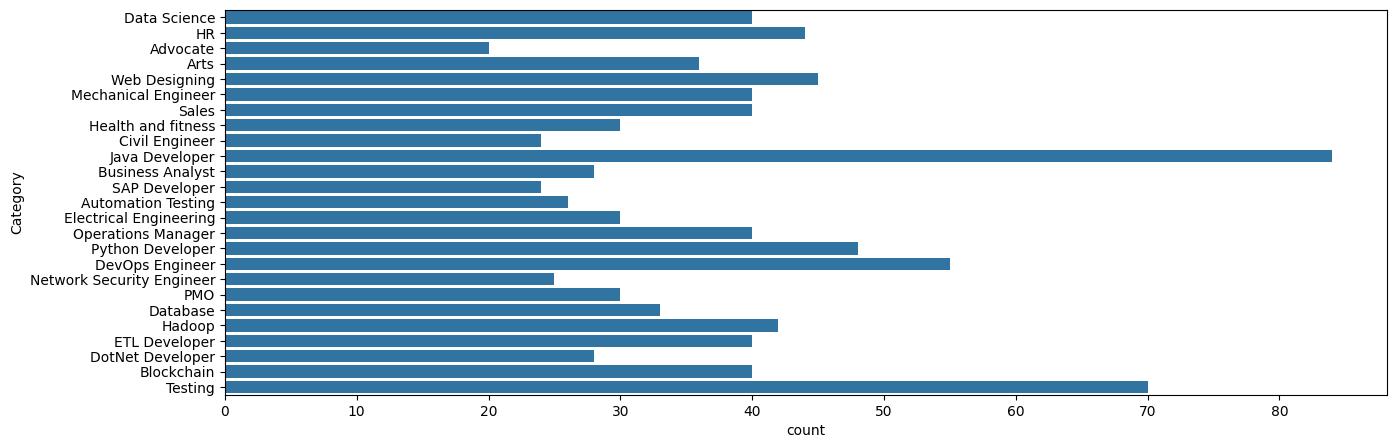

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

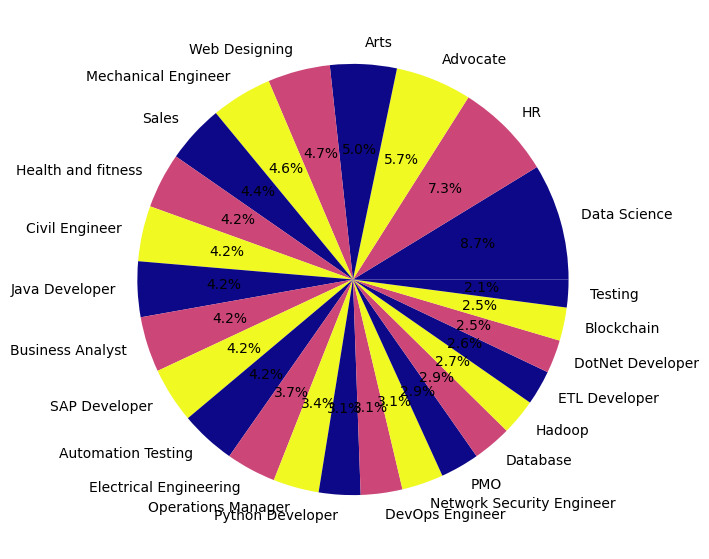

In [11]:
plt.figure(figsize=(15,7))
counts_ = df['Category'].value_counts()
labels_ = df['Category'].unique()
plt.pie(
    counts_,
    labels=labels_,
    autopct="%1.1f%%",
    shadow=False,
    colors=plt.cm.plasma(np.linspace(0, 1, 3)))
plt.show()

### Exploring the Resume

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Data Cleaning
1. URLs
2. Hashtags
3. @ mentions
4. Special characters
5. Punctuations

In [13]:
import re

def clean_resume(text):
    clean_text = re.sub('http\S+\s',' ',text)
    clean_text = re.sub('https\S+\s',' ',text)
    clean_text = re.sub('RT|CC',' ',text)
    clean_text = re.sub('@\S+',' ',text)
    clean_text = re.sub('#\S+\s',' ',text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%^&'()*+,:;-_./<=>?@[\]`{|}~"""),' ',text)
    clean_text = re.sub(r'[^\x00-\x7f]',' ',text)
    clean_text = re.sub('\s+',' ',text)
    return clean_text

In [14]:
clean_resume("my name is http://hello @worl")

'my name is http://hello @worl'

In [15]:
df['Resume']= df['Resume'].apply(lambda x: clean_resume(x))

In [16]:
df['Resume'][1]

'Education Details May 2013 to May 2017 B.E UIT-RGPV Data Scientist Data Scientist - Matelabs Skill Details Python- Exprience - Less than 1 year months Statsmodels- Exprience - 12 months AWS- Exprience - Less than 1 year months Machine learning- Exprience - Less than 1 year months Sklearn- Exprience - Less than 1 year months Scipy- Exprience - Less than 1 year months Keras- Exprience - Less than 1 year monthsCompany Details company - Matelabs description - ML Platform for business professionals, dummies and enthusiasts. 60/A Koramangala 5th block, Achievements/Tasks behind sukh sagar, Bengaluru, India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction. Deployed automated classification and regression model. linkedin.com/in/aditya-rathore- b4600b146 Reasearch and deployed the time series forecasting model ARIMA, SARIMAX, Holt-winter and Prophet. Worked on

#### Category words into Categorical Values

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])


In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

#### Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape

((769, 7384), (193, 7384))

#### Model training

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9792746113989638


In [23]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))


In [24]:
my_resume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

In [25]:
import pickle
clf = pickle.load(open('clf.pkl','rb'))
cleaned_resume = clean_resume(my_resume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)
# get name of predicted category
predicted_category_name = le.inverse_transform(prediction_id)
print(predicted_category_name)

['Network Security Engineer']


In [26]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
